In [212]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
train = pd.read_csv('../../../train.csv')
test = pd.read_csv('../../../test.csv')
submit = pd.read_csv('../../../submit.csv')
train.shape, test.shape, submit.shape

((40000, 21), (15000, 20), (15000, 2))

In [214]:
#df = pd.concat([train, test], axis = 0).reset_index(drop = True)
df = train
#ZHIWU=1数据无意义，剔除该类数据
df = df[df['ZHIWU']!=1]
#剔除无效指标
del df['ZHIWU']
del df['XUELI']
del df['HYZK']
del df['ZHIYE']
del df['ZHICHEN']
del df['DWYJCE']

In [215]:
#对数值类的进行转化：
df['GRYJCE'] = df['GRYJCE'] - 237
df['GRJCJS'] = df['GRJCJS'] -237 
df['GRZHYE'] = df['GRZHYE'] - 237
df['GRZHSNJZYE'] = df ['GRZHSNJZYE'] -237
df['GRZHDNGJYE'] = (df ['GRZHDNGJYE'] -237)*3
df['DKFFE'] = df['DKFFE'] - 237
df['DKYE'] = df['DKYE']-237

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [216]:
cate_2_cols = ['XINGBIE']
cate_cols = [ 'DWJJLX', 'DWSSHY', 'GRZHZT']
# 记录需要做embedding的变量
cEmb = ['DWJJLX','DWSSHY']

In [217]:
df['missing_rate'] = (df.shape[1] - df.count(axis = 1)) / df.shape[1]


#鬼知道，可能反应收入？
df['YEARPURINCM'] = df['GRZHYE']-df['GRZHSNJZYE']-df['GRZHDNGJYE']
#应还贷款月份，剩余需还贷款月份,已还贷款月份
df['HDZYF'] = df['DKFFE']*(df['DKLL']/100+1)/(df['GRYJCE']*2)
df['HDSYYF'] = df['DKYE']*(df['DKLL']/100+1)/(df['GRYJCE']*2)
df['HDYF'] = (df['DKFFE']-df['DKYE'])/(df['GRYJCE']*2)

#应还总额
df['HDZYFZE'] = df['DKFFE']*(df['DKLL']/100+1)
#待还总额
df['HDSYYFZE'] = df['DKYE']*(df['DKLL']/100+1)

#特征工程衍生的代码
# 图形旋转指标
df ['USAGE_RATE']=df['DKYE']/df['DKFFE']
df ['USAGE_AMOUNT'] = df['DKFFE']-df['DKYE']
df ['GJJRATE'] = (df['GRYJCE'])/df['GRJCJS']

# 金额取整指标
#df ['DKZS']= df['DKFFE']//100000  
#df ['YEZS']= df['DKYE']//100000
#df ['ZHZS']= df['GRZHYE']//10000
#df ['GJZS']= df['GRZHDNGJYE']//100000
#df ['SNZS']= df['GRZHSNJZYE']//10000
#df ['YJZS']= df['GRYJCE']//500

# 当年提取额
df ['WITHDRAW'] =  df ['GRYJCE']*12*2 - df['GRZHDNGJYE']

# 上年结转与余额的关系？

df['USAGEOVER'] = df['DKYE'] == 0 
df['NOUSAGE'] = df['DKYE'] == df['DKFFE']

df ['GRZHYE_CMP_GRZHYE'] = df['GRZHYE']/df['GRJCJS'] +df['GRJCJS']*25/12000
df ['TOP_USER'] = df['DKFFE'].apply(lambda x: x if (x%50000==0 or x==125000) else 0)
df ['TOP_USER1'] = df['DKFFE'].apply(lambda x: 1 if (x%50000==0 or x==125000) else x)

gen_feats = [ 'YEARPURINCM','HDZYF',
            'HDSYYF','HDYF','HDZYFZE','HDSYYFZE','USAGE_RATE','GJJRATE',
             'TOP_USER','TOP_USER1','WITHDRAW','USAGE_AMOUNT'
            ]
 
cate_cols += ['USAGEOVER','NOUSAGE','TOP_USER'] #'DKZS','YEZS','ZHZS','GJZS','SNZS','YJZS',


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

特征工程

/home/ubuntu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

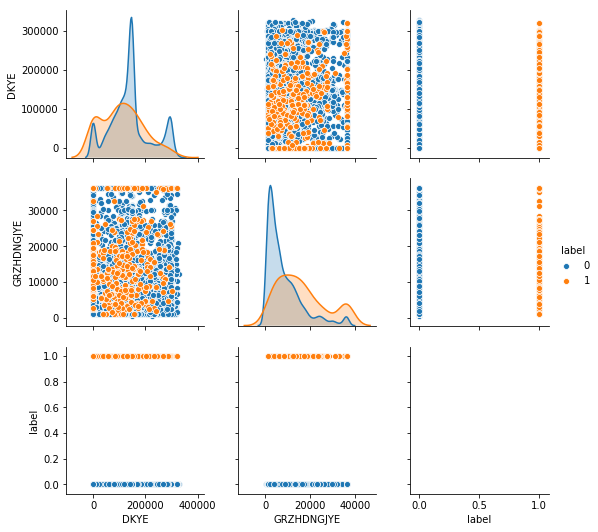

In [223]:
#df ['g0'] = (df[num_cols[i]]*df[num_cols[j]]).apply(lambda x: math.atan(x))
# df ['g0'] = (df[num_cols[i]]-df[num_cols[j]]).apply(lambda x: math.exp(-x*x/10000000000))        
import seaborn as sns
import math
df['g0'] = (df['GRZHYE'] - df['GRZHSNJZYE'])-df['DKYE']
df=df[df['WITHDRAW']==0]
sns.pairplot(df[['DKYE','GRZHDNGJYE','label']],hue='label')

In [150]:
df['label'].value_counts()

0.0    6877
1.0     318
Name: label, dtype: int64

In [12]:
df[['GRZHDNGJYE','GRZHDNGJYE']]

,GRZHDNGJYE,GRZHDNGJYE
0,600.000,600.000
1,828.200,828.200
2,6993.020,6993.020
3,2034.295,2034.295
4,-201.220,-201.220
5,534.800,534.800
6,5648.000,5648.000
7,813.400,813.400
8,5924.160,5924.160
9,299.750,299.750


In [2]:
def get_age(df,col = 'age'):
    df[col+"_genFeat1"]=(df['age'] > 18).astype(int)
    df[col+"_genFeat2"]=(df['age'] > 25).astype(int)
    df[col+"_genFeat3"]=(df['age'] > 30).astype(int)
    df[col+"_genFeat4"]=(df['age'] > 35).astype(int)
    df[col+"_genFeat5"]=(df['age'] > 40).astype(int)
    df[col+"_genFeat6"]=(df['age'] > 45).astype(int)
    return df, [col + f'_genFeat{i}' for i in range(1, 7)]

tNow = time.mktime(time.strptime( '2021-01-12 00:00:00','%Y-%m-%d %H:%M:%S'))
#这个怎么换算出来的啊，超哥
df['age'] = ((1609430399 - df['CSNY']) / (365 * 24 * 3600)).astype(int)
df['bornmonth'] = df['CSNY'].apply(lambda x: time.localtime(x)[1])
df, genFeats1 = get_age(df, col = 'age')

# More indics -- age 

#sns.distplot(df['age'][df['age'] > 0])

NameError: name 'time' is not defined

In [72]:
def get_daikuanYE(df,col):
    df[col + '_genFeat1'] = (df[col] > 100000).astype(int)
    df[col + '_genFeat2'] = (df[col] > 120000).astype(int)
    df[col + '_genFeat3'] = (df[col] > 140000).astype(int)
    df[col + '_genFeat4'] = (df[col] > 180000).astype(int)
    df[col + '_genFeat5'] = (df[col] > 220000).astype(int)
    df[col + '_genFeat6'] = (df[col] > 260000).astype(int)
    df[col + '_genFeat7'] = (df[col] > 300000).astype(int)
    return df, [col + f'_genFeat{i}' for i in range(1, 8)]

df, genFeats2 = get_daikuanYE(df, col = 'DKYE')
df, genFeats3 = get_daikuanYE(df, col = 'DKFFE')

In [73]:
from tqdm import tqdm

In [3]:
# One-hot 编码
for f in tqdm(cate_cols):
    df[f] = df[f].map(dict(zip(df[f].unique(), range(df[f].nunique()))))
    df[f + '_count'] = df[f].map(df[f].value_counts())
    df = pd.concat([df,pd.get_dummies(df[f],prefix=f"{f}")],axis=1)

#离散型特征关联
cate_cols_combine = [[cate_cols[i], cate_cols[j]] for i in range(len(cate_cols)) \
                     for j in range(i + 1, len(cate_cols))]

#离散型联合计数占比
for f1, f2 in tqdm(cate_cols_combine):
    df['{}_{}_count'.format(f1, f2)] = df.groupby([f1, f2])['id'].transform('count')
    df['{}_in_{}_prop'.format(f1, f2)] = df['{}_{}_count'.format(f1, f2)] / df[f2 + '_count']
    df['{}_in_{}_prop'.format(f2, f1)] = df['{}_{}_count'.format(f1, f2)] / df[f1 + '_count']


#离散型变量下各个数值型指标统计
for f1 in tqdm(cate_cols):
    g = df.groupby(f1)
    for f2 in num_cols + gen_feats:
        for stat in ['sum', 'mean', 'std', 'max', 'min', 'std']:
            if '{}_{}_{}'.format(f1, f2, stat)  in validIndics:
                df['{}_{}_{}'.format(f1, f2, stat)] = g[f2].transform(stat)
    for f3 in genFeats2 + genFeats3:
        for stat in ['sum', 'mean']:
            if '{}_{}_{}'.format(f1, f3, stat) in validIndics:
                df['{}_{}_{}'.format(f1, f3, stat)] = g[f3].transform(stat)

    
#离散型变量下各个数值特征指标
num_cols_gen_feats = num_cols + gen_feats
for f1 in tqdm(num_cols_gen_feats):
    g = df.groupby(f1)
    for f2 in num_cols_gen_feats:
        if f1 != f2:
            for stat in ['sum', 'mean', 'std', 'max', 'min', 'std']:
                if '{}_{}_{}'.format(f1, f2, stat) in validIndics:
                    df['{}_{}_{}'.format(f1, f2, stat)] = g[f2].transform(stat)

#连续性数值间的特征工程
for i in tqdm(range(len(num_cols_gen_feats))):
    for j in range(i + 1, len(num_cols_gen_feats)):
        if f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_add'  in validIndics:
            df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_add'] = df[num_cols_gen_feats[i]] + df[num_cols_gen_feats[j]]
        if f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_diff'  in validIndics:
            df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_diff'] = df[num_cols_gen_feats[i]] - df[num_cols_gen_feats[j]]
        if f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_multi'  in validIndics:
            df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_multi'] = df[num_cols_gen_feats[i]] * df[num_cols_gen_feats[j]]
        if f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_div'  in validIndics:
            df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_div'] = df[num_cols_gen_feats[i]] / (df[num_cols_gen_feats[j]] + 0.0000000001)

NameError: name 'tqdm' is not defined

训练集、测试集

In [75]:
train_df = df[df['label'].isna() == False].reset_index(drop=True)
test_df = df[df['label'].isna() == True].reset_index(drop=True)
display(train_df.shape, test_df.shape)

(39994, 422)

(10000, 422)

In [51]:
## 连续值的woe分箱处理
#import scorecardpy as sc
#bins_0 = sc.woebin(train_df[validIndics+['label']], y="label")
#train_df = pd.merge(train_df,sc.woebin_ply(train_df, bins_0)[[i+'_woe' for i in validIndics if i+'_woe' in validIndicsRw]+['id']  ],how='left',on='id')
#test_df = pd.merge(test_df,sc.woebin_ply(test_df, bins_0)[[i+'_woe'  for i in validIndics if i+'_woe' in validIndicsRw ]+['id']  ],how='left',on='id')

In [79]:
drop_feats = []
drop_feats = [f for f in train_df.columns if train_df[f].nunique() == 1 or train_df[f].nunique() == 0]
len(drop_feats), drop_feats

(1, ['missing_rate'])

In [80]:
cols = [col for col in train_df.columns if col not in ['id', 'label'] + drop_feats]

In [81]:
train_df.describe()

,XINGBIE,CSNY,DWJJLX,DWSSHY,GRJCJS,GRZHZT,GRZHYE,GRZHSNJZYE,GRZHDNGJYE,GRYJCE,...,numsOf_GRZHYE_diff_GRZHDNGJYE_HDYF_multi,numsOf_GRZHYE_diff_GRZHDNGJYE_HDYF_div,numsOf_GRZHYE_diff_GRZHSNJZYE_YEARPURINCM_multi,numsOf_GRZHYE_diff_GRZHSNJZYE_YEARPURINCM_div,numsOf_GRZHYE_diff_GRZHSNJZYE_HDSYYF_multi,numsOf_GRZHYE_diff_GRZHSNJZYE_HDYF_multi,numsOf_GRZHYE_diff_GRZHSNJZYE_HDYF_div,numsOf_YEARPURINCM_HDZYF_multi,numsOf_YEARPURINCM_HDSYYF_multi,numsOf_YEARPURINCM_HDYF_multi
count,39994.000000,3.999400e+04,39994.000000,39994.000000,39994.000000,39994.000000,39994.000000,39994.000000,39994.000000,39994.000000,...,3.999400e+04,3.999400e+04,3.999400e+04,3.999400e+04,3.999400e+04,3.999400e+04,3.999400e+04,3.999400e+04,3.999400e+04,3.999400e+04
mean,1.361904,4.804880e+08,1.955268,6.834200,4270.991214,0.005476,14783.907521,15081.729709,-354.089497,449.982701,...,5.268634e+05,5.029838e+12,1.849031e+08,1.930774e+10,-1.851914e+05,-7.854554e+04,2.052774e+12,-2.993560e+04,4.950440e+04,-7.723499e+04
std,0.480869,9.752510e+08,2.932171,4.663459,2844.718828,0.092717,20191.323425,20061.923016,7969.029462,344.940588,...,1.437513e+06,4.777124e+13,1.177055e+09,2.750951e+12,4.175485e+06,1.301632e+06,2.465904e+13,4.326874e+06,3.705045e+06,1.207944e+06
min,0.000000,3.150720e+07,0.000000,0.000000,550.000000,0.000000,0.000000,0.000000,-240555.745000,9.550000,...,-3.075000e+06,-9.429696e+02,-7.592296e+09,-1.546324e+04,-1.138616e+08,-4.566406e+07,-1.580725e+15,-1.707478e+08,-1.209340e+08,-4.850042e+07
25%,1.000000,3.391776e+08,0.000000,3.000000,2125.000000,0.000000,1655.228750,2761.678750,-814.293750,174.000000,...,2.840133e+04,5.083629e+01,1.033832e+06,7.986862e-01,-7.551387e+05,-6.689386e+04,-1.386574e+02,-4.781471e+05,-3.057307e+05,-3.990270e+04
50%,1.000000,5.205276e+08,1.000000,6.000000,3650.500000,0.000000,8305.872500,8777.247500,534.800000,379.830000,...,1.160881e+05,3.808753e+02,1.544043e+07,1.228357e+00,1.302089e+05,7.187333e+03,1.796958e+01,3.988772e+05,2.067019e+05,9.027988e+03
75%,2.000000,6.338016e+08,2.000000,10.000000,5594.406250,0.000000,19361.463750,19335.523750,2216.092500,612.105000,...,4.444996e+05,2.133793e+03,9.504473e+07,1.392637e+00,1.576738e+06,9.241615e+04,4.108345e+02,1.688361e+06,1.504453e+06,7.739312e+04
max,2.000000,1.903646e+11,27.000000,20.000000,13455.000000,4.000000,366414.575000,313111.420000,52828.095000,1508.940000,...,6.010184e+07,1.876980e+15,6.446119e+10,5.105143e+14,9.277091e+07,1.980470e+07,7.171058e+14,9.927211e+07,9.894531e+07,2.268783e+07


In [186]:
# 利用神经网络做embedding以及特征工程 
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Reshape, Dropout
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras import optimizers
from keras import regularizers

In [187]:
# keras 神经网络生成器
# 只采用需要进行embedding的变量，后续优化应该加入其他连续或者分类变量
def build_embedding_network(rawsize,embedingsize,densesize):
    inputs = []
    embeddings = []
    
    # 离散变量
    for i in range(len(rawsize)):
        input_cate_feature = Input(shape=(1,))
        embedding = Embedding(rawsize[i], embedingsize[i], input_length=1)(input_cate_feature)
        embedding = Reshape(target_shape=(embedingsize[i],))(embedding)
        inputs.append(input_cate_feature)
        embeddings.append(embedding)
    
    # 连续变量
    input_numeric = Input(shape=(densesize,))
    embedding_numeric = Dense(100,kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01))(input_numeric) 
    inputs.append(input_numeric)
    embeddings.append(embedding_numeric)
    
    if len(rawsize) >0:
        x = Concatenate()(embeddings)
        x = Dense(50,kernel_initializer='uniform', activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01))(x)
    else:
        x = Dense(50,kernel_initializer='uniform', activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01))(embedding_numeric)
    x = Dropout(.15)(x)
    x = Dense(20,kernel_initializer='uniform', activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01))(x)
    x = Dropout(.15)(x)
    x = Dense(10,kernel_initializer='uniform', activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01))(x)
    x = Dropout(.15)(x)
    x = Dense(5,kernel_initializer='uniform', activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01))(x)
    x = Dropout(.15)(x)
    output = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, output)
    sgd = optimizers.SGD(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer=sgd)
    
    return model

In [4]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
input_data = []
input_data_test = []
mms.fit(train_df[cols].values)
input_data.append(mms.transform(train_df[cols].values))
input_data_test.append(mms.transform(test_df[cols].values))
kerasModel = build_embedding_network([],[],len(cols))
output_data = train_df['label'].values
history = kerasModel.fit(input_data, output_data, epochs=100, batch_size=1000,validation_split=0.1)

NameError: name 'train_df' is not defined

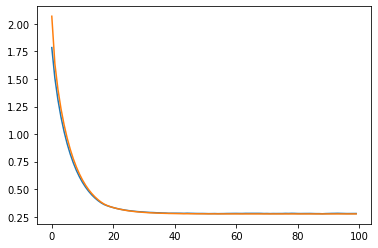

In [189]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])


In [190]:
# Build a new model for embedding
for layer in [8]:
    print (kerasModel.get_config()['layers'][layer]['name'])
    intermediate_layer_model = Model(inputs=kerasModel.input,
                                     outputs=kerasModel.get_layer(kerasModel.get_config()['layers'][layer]['name']).output)
    encoding_result = pd.DataFrame(intermediate_layer_model.predict(input_data))
    encoding_result.columns = ['KERAS_'+str(layer)+"_"+str(i) for i in encoding_result.columns]
    train_df = pd.concat([train_df,encoding_result],axis=1)
    
    encoding_result = pd.DataFrame(intermediate_layer_model.predict(input_data_test))
    encoding_result.columns = ['KERAS_'+str(layer)+"_"+str(i) for i in encoding_result.columns]
    test_df = pd.concat([test_df,encoding_result],axis=1)

dense_4


IndexError: list index out of range

In [191]:
cols = [col for col in train_df.columns if col not in ['id', 'label']]

In [82]:
from sklearn.model_selection import StratifiedKFold
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
import time
from lightgbm.callback import reset_parameter
import math

In [83]:
def tpr_weight_funtion(y_true,y_predict):
    d = pd.DataFrame()
    d['prob'] = list(y_predict)
    d['y'] = list(y_true)
    d = d.sort_values(['prob'], ascending=[0])
    y = d.y
    PosAll = pd.Series(y).value_counts()[1]
    NegAll = pd.Series(y).value_counts()[0]
    pCumsum = d['y'].cumsum()
    nCumsum = np.arange(len(y)) - pCumsum + 1
    pCumsumPer = pCumsum / PosAll
    nCumsumPer = nCumsum / NegAll
    TR1 = pCumsumPer[abs(nCumsumPer-0.001).idxmin()]
    TR2 = pCumsumPer[abs(nCumsumPer-0.005).idxmin()]
    TR3 = pCumsumPer[abs(nCumsumPer-0.01).idxmin()]
    
    return ('TPR',0.4 * TR1 + 0.3 * TR2 + 0.3 * TR3,True)

def AUC_PRE(y_true,y_predict):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import auc
    precision, recall, thresholds = precision_recall_curve(y_true, y_predict)
    auc_score = auc(recall, precision)   
    return ('AUC_PRE',auc_score,True)

def f1_loss(y, pred):
    beta = 2
    p = 1. / (1 + np.exp(-pred))
    grad = p * ((beta - 1) * y + 1) - beta * y
    hess = ((beta - 1) * y + 1) * p * (1.0 - p)
 
    return grad, hess
def logistic_obj(y_hat, pred):
    y = pred
    p = y_hat 
    p = 1. / (1. + np.exp(-y_hat)) # 用于避免hessian矩阵中很多0
    grad = p - y
    hess = p * (1. - p)
    grad = 4 * p * y + p - 5 * y
    hess = (4 * y + 1) * (p * (1.0 - p))
    return grad, hess

In [1]:
import random
from sklearn.metrics import balanced_accuracy_score
oof = np.zeros(train_df.shape[0])
feat_imp_df = pd.DataFrame({'feat': cols, 'imp': 0})
test_df['prob'] = 0
clf = LGBMClassifier(
    boosting_type = 'gbdt',
    learning_rate=0.03,
    n_estimators=2023,
    num_leaves=101,
 #   max_depth = 20,
    random_state=1023,
    metric=None,
    is_unbalance=True,
    reg_alpha=0.01,
    reg_lambda=0.01,
    bagging_freq = 10,
    bagging_fraction = 0.8,
    feature_fraction = 0.8,
    min_data_in_leaf = 10,
)
reset_parameters = {
    'learning_rate' : [ 0.05*math.exp(-0.005*i) for i in range(2023)]
}

modellist = []
val_aucs = []
seeds = [1023]
for seed in seeds:
    print(seed)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    for i, (trn_idx, val_idx) in enumerate(skf.split(train_df, train_df['label'])):
        print('--------------------- {}rd fold ---------------------'.format(i))
        t = time.time()
        trn_x, trn_y = train_df[cols].iloc[trn_idx].reset_index(drop=True), train_df['label'].values[trn_idx]
        val_x, val_y = train_df[cols].iloc[val_idx].reset_index(drop=True), train_df['label'].values[val_idx]
        clf.fit(
            trn_x, trn_y,
            eval_set=[(val_x, val_y)],
       #      categorical_feature=cate_cols,
            eval_metric='binary_error',
            early_stopping_rounds=200,
            verbose=200,
      #      callbacks = [reset_parameter(**reset_parameters)]
        )
        modellist.append(clf)
        feat_imp_df['imp'] += clf.feature_importances_ / skf.n_splits
        oof[val_idx] = clf.predict_proba(val_x)[:, 1]
        test_df['prob'] += clf.predict_proba(test_df[cols])[:, 1] / skf.n_splits / len(seeds)

    cv_auc = roc_auc_score(train_df['label'], oof)
    val_aucs.append(cv_auc)
    print('\ncv_auc: ', cv_auc)
print(val_aucs, np.mean(val_aucs))

ImportError: cannot import name 'balanced_accuracy_score' from 'sklearn.metrics' (/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [49]:
clf.fit(
    train_df[cols],train_df['label'],
       #      categorical_feature=cate_cols,
            eval_metric=tpr_weight_funtion,
       #     early_stopping_rounds=200,
           verbose=200,
        #    callbacks = [reset_parameter(**reset_parameters)]
        )
test_df['prob'] += clf.predict_proba(test_df[cols])[:, 1]

In [85]:
print(val_aucs, np.mean(val_aucs))
tpr = round(tpr_weight_funtion(train_df['label'], oof)[1], 6)
tpr, round(np.mean(val_aucs), 5)

[0.9354490502945435] 0.9354490502945435


(0.529489, 0.93545)

In [25]:
#指标重要性分析
dImp = pd.DataFrame({
        'column': cols,
        'importance': [sum(i)/len(i) for i in np.array([ i.feature_importances_ for i in modellist ]).transpose()] ,
    }).sort_values(by='importance',ascending=False).reset_index()

In [33]:
dImp.to_csv('Feature_imp.csv')

In [34]:
print([i for i in dImp[dImp.importance>20].column.values.tolist()  ])

['numsOf_GRJCJS_GRYJCE_div', 'DWJJLX_in_DWSSHY_prop', 'CSNY', 'DWSSHY_in_DWJJLX_prop', 'DWJJLX_DWSSHY_count', 'numsOf_GRJCJS_GRZHDNGJYE_diff', 'numsOf_GRZHDNGJYE_GRZHYE_diff_GRZHSNJZYE_div', 'GRJCJS_DKFFE_multi_DKLL_ratio_std', 'numsOf_GRZHDNGJYE_GRYJCE_div', 'numsOf_GRJCJS_GRZHDNGJYE_div', 'GRYJCE_GRJCJS_std', 'GRYJCE_GRJCJS_max', 'GRJCJS_DKFFE_DKY_multi_DKLL_std', 'GRZHZT_in_DWSSHY_prop', 'GRJCJS_GRZHDNGJYE_std', 'GRJCJS_YEARPURINCM_std', 'numsOf_GRZHDNGJYE_YEARPURINCM_div', 'GRZHZT_GRZHYE_mean', 'GRJCJS_GRZHDNGJYE_GRZHSNJZYE1_std', 'GRJCJS_HDSYYF_std', 'DWJJLX_GRZHDNGJYE_sum', 'GRJCJS_HDZYF_std', 'GRYJCE_DKFFE_DKY_multi_DKLL_std', 'numsOf_GRZHYE_GRZHDNGJYE_div', 'GRJCJS_HDYF_std', 'GRJCJS_DKYE_std', 'GRYJCE_GRZHYE_diff_GRZHDNGJYE_std', 'GRJCJS_GRZHDNGJYE_GRZHSNJZYE_std', 'GRJCJS_HDYF_mean', 'GRZHDNGJYE_GRJCJS_sum', 'numsOf_GRZHDNGJYE_GRZHSNJZYE_GRZHYE_diff_GRZHSNJZYE_div', 'numsOf_GRYJCE_HDZYF_add', 'GRYJCE_DKFFE_multi_DKLL_ratio_std', 'DWSSHY_GRZHZT_count', 'GRJCJS_DKFFE_std', 'GRJ

In [201]:
print(len(dImp[dImp['importance']<1]['column'].values.tolist()))

43


In [202]:
submit['id'] = test_df['id']
submit['label'] = test_df['prob']
submit = pd.merge(test,submit,on='id',how='left')[['id','label']]
submit['label'] = submit['label'].apply(lambda x: 0 if pd.isnull(x) else x)


submit.to_csv('../sub/submission{}_{}.csv'.format(tpr, round(np.mean(val_aucs), 6)), index = False)
submit.shape


(15000, 2)